# Computer Assignment #4

## Regression

- **Ali Hamzehpour 810100129**
- **Mina Shirazi 810100250**
- **Mohammad Amin Yousefi 810100236**

### Summary

In this assignment, we are asked to create a regression model for diabetes dataset. This dataset
consists of medical diagnostic measurements from numerous patients and is specifically
designed to study diabetes progression. We will use *scikit-learn* library to create a regression model to predict the
quantitative measure of disease progression one year after baseline.

## Warm-up
First we load the dataset and take a look at first 10 rows of it:

In [1]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes(scaled=False)

In [2]:
import pandas as pd

diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
diabetes_df['target'] = diabetes_data.target
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
5,23.0,1.0,22.6,89.0,139.0,64.8,61.0,2.00,4.1897,68.0,97.0
6,36.0,2.0,22.0,90.0,160.0,99.6,50.0,3.00,3.9512,82.0,138.0
7,66.0,2.0,26.2,114.0,255.0,185.0,56.0,4.55,4.2485,92.0,63.0
8,60.0,2.0,32.1,83.0,179.0,119.4,42.0,4.00,4.4773,94.0,110.0
9,29.0,1.0,30.0,85.0,180.0,93.4,43.0,4.00,5.3845,88.0,310.0


As you can see we have 10 features and 1 target column:
* Age (age in years)
* Sex
* Body Mass Index (BMI)
* Average Blood Pressure (BP)
* Six blood serum measurements:
    * s1: tc, total serum cholesterol
    * s2: ldl, low-density lipoproteins
    * s3: hdl, high-density lipoproteins
    * s4: tch, total cholesterol / HDL
    * s5: ltg, possibly log of serum triglycerides level
    * s6: glu, blood sugar level
    
and the target is a quantitative measure of disease progression one year after baseline.

Now we print the data type of each column to make sure that all of them are numerical:


In [3]:
diabetes_df.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

Then, we check if there is any missing value in the dataset. As you can see there is no missing value in the dataset.

In [4]:
missing_values = diabetes_df.isnull().sum()

print("Missing values in each feature:")
print(missing_values)

Missing values in each feature:
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


Now we have to normalize the dataset. The reason is that the features have different scales and this can cause problems in the learning process. We use `StandardScaler` to normalize the dataset. it standardizes features by removing the mean and scaling to unit variance:

$$ z = \frac{x - u}{s} $$

where $u$ is the mean of the training samples and $s$ is the standard deviation of the training samples.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(diabetes_data.data)
Y_normalized = scaler.fit_transform(diabetes_data.target.reshape(-1, 1))
print("features normalized:")
print(X_normalized[:5])
print("target normalized:")
print(Y_normalized[:5])


features normalized:
[[ 0.80050009  1.06548848  1.29708846  0.45984057 -0.92974581 -0.73206462
  -0.91245053 -0.05449919  0.41853093 -0.37098854]
 [-0.03956713 -0.93853666 -1.08218016 -0.55350458 -0.17762425 -0.40288615
   1.56441355 -0.83030083 -1.43658851 -1.93847913]
 [ 1.79330681  1.06548848  0.93453324 -0.1192138  -0.95867356 -0.71889748
  -0.68024452 -0.05449919  0.06015558 -0.54515416]
 [-1.87244107 -0.93853666 -0.24377122 -0.77064997  0.25629203  0.52539714
  -0.75764652  0.72130245  0.47698252 -0.19682291]
 [ 0.11317236 -0.93853666 -0.76494435  0.45984057  0.08272552  0.32789006
   0.17117751 -0.05449919 -0.67250161 -0.98056821]]
target normalized:
[[-0.01471948]
 [-1.00165882]
 [-0.14457991]
 [ 0.69951294]
 [-0.22249618]]


Now we split the dataset into training and test sets. We use 90% of the data for training and 10% for testing. We use `train_test_split` function from `sklearn.model_selection` to do this. We set `shuffle` to `True` to shuffle the data before splitting. This makes sure that the training and test sets are representative of the overall distribution of the data.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y_normalized, random_state=42, test_size=0.1, shuffle=True)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Number of instances in the training dataset:", len(X_train))
print("Number of instances in the testing dataset:", len(X_test))

Shape of X_train: (397, 10)
Shape of X_test: (45, 10)
Shape of y_train: (397, 1)
Shape of y_test: (45, 1)
Number of instances in the training dataset: 397
Number of instances in the testing dataset: 45


## Main Task

### Part 1: Functions' Implementation

We have to implement 4 functions from scratch for measuring the performance of the model. These functions are:

1. Mean Squared Error (MSE)

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

2. Mean Absolute Error (MAE)

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$

3. Root Mean Squared Error (RMSE)

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$

4. R2 Score

$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$





In [7]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def r2_score(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y_true) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


### Part 2: Building and Training the Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
_ = model.fit(X_train, y_train)

### Part 3: Model Evaluation
In this part we compare the predicted values with the actual progression measures using a scatter
plot, then we evaluate the model using the functions we implemented in the first part.

In [9]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

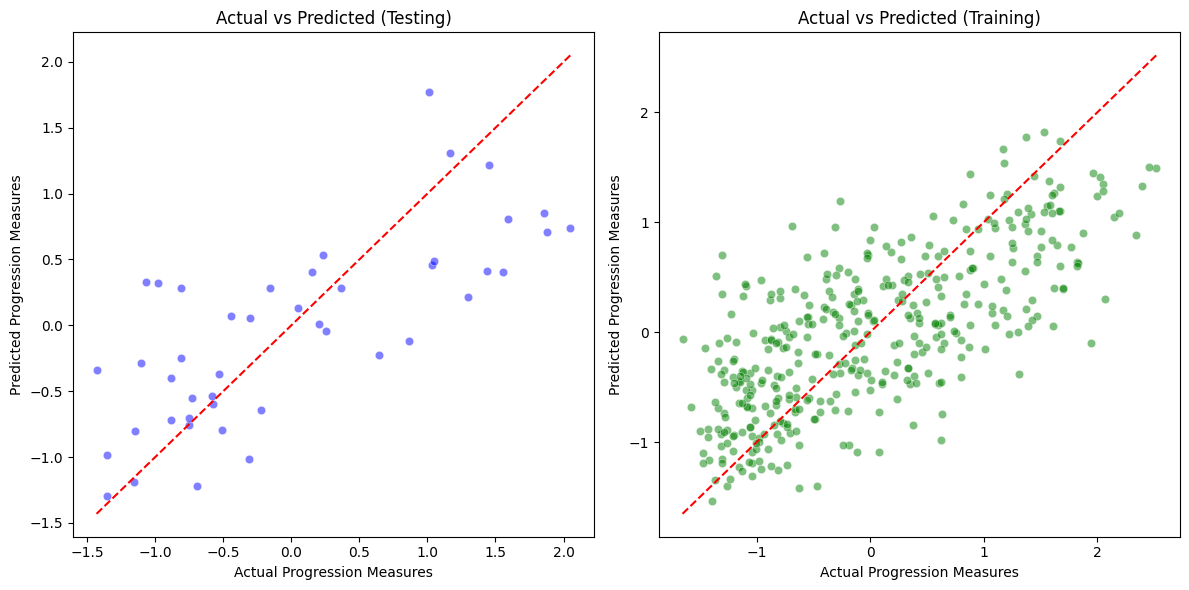

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test.reshape(-1), y=y_test_pred.reshape(-1), color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted (Testing)')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_train.reshape(-1), y=y_train_pred.reshape(-1), color='green', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Actual vs Predicted (Training)')
plt.xlabel('Actual Progression Measures')
plt.ylabel('Predicted Progression Measures')

plt.tight_layout()
plt.show()


In [11]:
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

train_results = [mse_train, mae_train, rmse_train, r2_train]
test_results = [mse_test, mae_test, rmse_test, r2_test]

metrics = ['MSE', 'MAE', 'RMSE', 'R² score']

df = pd.DataFrame({'Data Type/Optimizer': ['Train Set', 'Test Set'],
                   **{metric: [train_results[i], test_results[i]] for i, metric in enumerate(metrics)}})

df

,Data Type/Optimizer,MSE,MAE,RMSE,R² score
0,Train Set,0.485731,0.563998,0.696944,0.512515
1,Test Set,0.462726,0.539943,0.680240,0.551420


### Part 4: Ordinary Least Squares

In this part we use `statsmodel.api` to train the model using OLS method and show the statistics of the model.

* Ordinary Least Squares (OLS) is a method used in regression analysis to estimate the parameters of a linear regression model.
* OLS estimates the coefficients by minimizing the sum of squared differences between the observed values of the dependent variable and the values predicted by the model.  

In [12]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_normalized)
ols_model = sm.OLS(Y_normalized, X_normalized).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.518
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              46.38
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                    2.68e-62
Time:                        21:47:41   Log-Likelihood:                         -466.00
No. Observations:                 442   AIC:                                      952.0
Df Residuals:                     432   BIC:                                      992.9
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0062      0.037     -0.168      0.867      -0.079       0.066
x2            -0.1481      0.038     -3.922      0.000      -0.222      -0.074
x3             0.3211      0.041      7.822      0.000       0.240       0.402
x4             0.2004      0.040      4.964      0.000       0.121       0.280
x5            -0.4893      0.257     -1.903      0.058      -0.995       0.016
x6             0.2945      0.209      1.408      0.160      -0.117       0.706
x7             0.0624      0.131      0.476      0.634      -0.195       0.320
x8             0.1094      0.100      1.098      0.273      -0.086       0.305
x9             0.4640      0.106      4.375      0.000       0.256       0.673
x10            0.0418      0.041      1.026      0.305      -0.038       0.122
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         21.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Questions

#### **1. Analyze and evaluate the values in Table (1).**
* The first thing that we can notice is that the values between train and test sets are very close to each other. This means that the model is not overfitting and it's generalizing well. 
* Then we can see that the test values are better than the train values. We repeated the experiment multiple times with different random states and we saw that train set results didn't change much but the test set results were sometimes better and sometimes worse(Its r2 score ranged from 0.4 to 0.6). This could mean that the linear regression for this dataset is not stable enough and its generalizing is not good enough or the reason can be the small size of the dataset.
* We can also judge the model's performance by comparing the r2 score which is a more reliable metric.(it compares the result with a constant estimation) The r2 score is 0.5 which means that the model can explain 50% of the variance in the target variable. This is not a very good score but it's not bad either.
* The MSE is also near 0.5 which means on average the square of the difference between the predicted and actual values is 0.5 which again is moderately good. RMSE is simply the square root of MSE so it's near 0.7.
* The MAE is around 0.55. The reason that it's higher than MSE is that most of our prediction errors is less than 1 so the square of the differences will be less than the absolute differences.

#### **2. Review the R² and Adjusted R² values obtained in part 4. Explain what these values indicate and what the implications of high or low values might be. Also, discuss the differences between these two metrics.**

* `R2 score`:
    * As we mentioned in the previous question, it shows how better our model is compared to when we just predict the mean of the target variable:
    $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$
    * The closer the value of R2 to 1, the better the model is. If the R2 is near 0, it means that the model is not better than the mean prediction and is basically useless!
    * It can be even negative if the model is worse than the mean prediction!

* `Adjusted R2 score`:
    * Adjusted R2 is a modified version of R2 that has been adjusted for the number of features in the model. It is calculated as:
    $$ Adj.\ R^2 = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1} $$
    * where n is the number of samples and p is the number of predictors(features).
    * The adjusted R2 increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance.
    * Adjusted R2 is always less than or equal to R2. A value of 1 indicates a model that perfectly predicts values in the target field. A value that is less than or equal to 0 indicates a model that has no predictive value. In the real world, adjusted R2 lies between these values.
    * The adjusted R2 is a better metric for comparing models with many different numbers of predictors or when we want to add more features to improve our model.

* Problems with R2 that are corrected with an adjusted R2:
    * R2 tends to optimistically estimate the fit of the linear regression. It always increases as the number of effects are included in the model. Adjusted R2 attempts to correct for this overestimation. Adjusted R2 might decrease if a specific effect does not improve the model.
    * Similarly, if your model has too many terms and too many high-order polynomials you can run into the problem of over-fitting the data. When you over-fit data, a misleadingly high R2 value can lead to misleading projections.

* In our case we can see that R2 and adjusted R2 are close to each other. it indicates that the model has a good fit to the data and provides a reliable estimate of the relationship between the independent and dependent variables, even after accounting for the number of predictors in the model.

#### **3. Review the p-values obtained in part 4 for each column of data and explain what these values indicate. Discuss what an appropriate value for p-values is and which columns currently have suitable values.**


* In ordinary least squares (OLS) regression, the p-value associated with each coefficient estimate indicates the statistical significance of that predictor variable in predicting the response variable.

* Here is how this test is done:

    * Null Hypothesis: The null hypothesis in the context of OLS regression states that the coefficient of the predictor variable is equal to zero, implying that the predictor variable has no effect on the response variable.

    * Alternative Hypothesis: The alternative hypothesis states that the coefficient of the predictor variable is not equal to zero, implying that the predictor variable has an effect on the response variable.

    * p-value: The p-value is the probability of observing a test statistic as extreme as the one computed from the sample data, assuming that the null hypothesis is true.

* A p-value less than a significance level (commonly 0.05) indicates that the coefficient is statistically significant, meaning that the predictor variable is likely to have a meaningful effect on the response variable.

* We can see check the column `P>|t|` in the summary table. If the value is less than 0.05, it means that the corresponding feature is statistically significant. In our case these are the features that have p-value less than 0.05:
    * Sex
    * BMI
    * BP
    * s1
    * s5


#### **4. Assess and analyze the importance of each feature in the dataset based on the results obtained in part 4 regarding an individual's diabetic condition.**

* We can analyze the importance of each feature based on the coefficients of the linear regression model and also the p-values of the features. The features with higher absolute values of coefficients are more important. Also, the features with p-values less than 0.05 are more important:

    * **Age**: Surprisingly, this feature seems to be the least important among all the features.
    * **Sex**: We can see there's a negative coefficient for this feature which means that the progression measure is lower for females(sex = 2 is female and sex = 1 is male in this dataset)
    * **BMI**: This feature has the third highest coefficient among all the features and as we expected the higher the BMI, the higher the progression measure.
    * **BP**: This is also an important feature and the higher the BP, the higher the progression measure.
    * **s1**: This feature has the highest coefficient among all the features and it's the most important feature in this dataset. The higher the total serum cholesterol, the lower the progression measure.
    * **s2**: this feature's p-value was 0.2 but it has a significant coefficient. The higher the low-density lipoproteins, the higher the progression measure.
    * **s3**: This feature has low importance in the model.
    * **s4**: This feature also had p-value > 0.05 but it has a significant coefficient so it's slightly important.
    * **s5**: This feature has the second highest coefficient among all the features and it's the second most important feature in this dataset. The higher the log of serum triglycerides level, the lower the progression measure.
    * **s6**: This feature has low importance in the model.

* It's also worth to note that the std error for coefficients of Six blood serum measurements is higher than other features and this means that other features are more reliable.
    


## Sources
* [Adj. r2 score](https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-adjusted-r-squared)
* [Adj. r2 score(2)](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/adjusted-r2/)